In [1]:
import torch


In [2]:
import numpy as np

In [3]:
import torch.nn as nn
import torchvision

## Video Lecture 2
### Intro To Tensors

In [15]:
x = torch.empty(2,3)
print(x)
y = torch.ones(2,3, dtype= torch.int) # torch.zeros
print(y)
print(x.size())

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.Size([2, 3])


In [54]:
x = torch.randn(2,2)
print(x)
x = torch.tensor([2,0.1, 5])
print(x)
print()
x,y = torch.randn(2,2), torch.randn(2,2)
print(x)
print(y)
print("x+y: ", x+y)
print("torch.add(): ",torch.add(x,y))
print()
y.add_(x)
print("inplace add: ", y)

tensor([[ 0.1618, -1.6652],
        [-1.2097,  0.7262]])
tensor([2.0000, 0.1000, 5.0000])

tensor([[-0.3987, -0.8757],
        [-0.0690, -0.8475]])
tensor([[-0.3325,  0.3902],
        [-3.9557, -0.1629]])
x+y:  tensor([[-0.7312, -0.4855],
        [-4.0247, -1.0104]])
torch.add():  tensor([[-0.7312, -0.4855],
        [-4.0247, -1.0104]])

inplace add:  tensor([[-0.7312, -0.4855],
        [-4.0247, -1.0104]])


In [28]:
x = torch.randn(5,3)
print(x)
print(x[:, 0]) # All Rows 1st column
print(x[0, :]) # All Columns 1st row
print(x[1,1].item())

tensor([[0.2481, 0.0920, 0.5241],
        [0.2037, 0.1922, 0.4664],
        [0.1794, 0.0157, 0.9306],
        [0.1246, 0.2532, 0.3889],
        [0.1430, 0.3258, 0.3409]])
tensor([0.2481, 0.2037, 0.1794, 0.1246, 0.1430])
tensor([0.2481, 0.0920, 0.5241])
0.19224846363067627


In [53]:
x = torch.randn(4,4)
print(x)
y = x.view(16) # reshape
print(y, y.size())
y = x.view(-1, 8) # if you don'f know the first dimension
print(y, y.size())

tensor([[-1.1729,  0.7292,  1.0129,  1.1475],
        [ 2.2537,  0.3857, -1.4533, -1.6871],
        [-1.2116,  0.9200,  1.2944, -0.1731],
        [ 0.6048, -0.1508, -1.6144,  1.2320]])
tensor([-1.1729,  0.7292,  1.0129,  1.1475,  2.2537,  0.3857, -1.4533, -1.6871,
        -1.2116,  0.9200,  1.2944, -0.1731,  0.6048, -0.1508, -1.6144,  1.2320]) torch.Size([16])
tensor([[-1.1729,  0.7292,  1.0129,  1.1475,  2.2537,  0.3857, -1.4533, -1.6871],
        [-1.2116,  0.9200,  1.2944, -0.1731,  0.6048, -0.1508, -1.6144,  1.2320]]) torch.Size([2, 8])


In [42]:
# torch to numpy
a = torch.ones(5)
print(a)
b = a.numpy()
print(b, type(b)) # both a and b share the same memory location
a.add_(1)
print(a) #<- tensor
print(b) #<- numpy

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [43]:
# numpy to torch
a = np.ones(5)
b = torch.from_numpy(a) # dtype = float64
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [51]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device = device)
    #or
    y = torch.ones(5)
    y = y.to(device)
    
    z = x + y
    print(z)

z = z.to("cpu")
z = z.numpy()
print(z, type(z))

tensor([2., 2., 2., 2., 2.], device='cuda:0')
[2. 2. 2. 2. 2.] <class 'numpy.ndarray'>


In [52]:
x = torch.ones(5, requires_grad = True) # by default requires_grad = False
print(x)
# requires_grad defines that the variable is trainable


tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Video Lecture 3
### Autograd

In [63]:
x = torch.randn(3, requires_grad = True)
print(x)
y = x+2
print(y)
z = y*y*2
print(y)
z = z.mean() # <- this is a scaler 
print(z)
# v = torch.tensor([0.1,1,0.001], dtype = torch.float32) # <- if z is not a scaler you need to pass a vector to the bacward function
z.backward() # dz/dx # backward() function requires z to be a scalar value
print(x.grad)

tensor([-1.3970,  1.3871, -0.8718], requires_grad=True)
tensor([0.6030, 3.3871, 1.1282], grad_fn=<AddBackward0>)
tensor([0.6030, 3.3871, 1.1282], grad_fn=<AddBackward0>)
tensor(8.7393, grad_fn=<MeanBackward0>)
tensor([0.8040, 4.5161, 1.5043])


In [68]:
x = torch.randn(3, requires_grad=True)
print(x)
# remove grad using 3 different methods

# x.requires_grad_(False)
# print(x)
# y = x.detach()
with torch.no_grad():
    y = x + 2
print(y)

tensor([-1.6329, -0.9948, -1.6305], requires_grad=True)
tensor([0.3671, 1.0052, 0.3695])


In [74]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
    model_output = (weights * 3).sum()

    model_output.backward()
    print(weights.grad) # grad accumulates over the epochs

    weights.grad.zero_() # clear out the grad to get accurate results

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Video Lecture 4
### Backpropagation

In [79]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad = True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# Backward pass
loss.backward()
print(w.grad)

# update the weights 
# next forward and backward pass


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Video Lecture 5
### Manual Gradient Descent

In [81]:
X = np.array([1, 2, 3, 4], dtype= np.float32)
Y = np.array([2, 4, 6, 8], dtype= np.float32)
w = 0.0

# calcuate model prediction
def forward(x):
    return w*x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()
# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x * (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()
print(f'Prediction beore training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iter = 10
for epoch in range(n_iter):
    # Forward pass
    y_pred = forward(X)
    # Loss
    l = loss(Y, y_pred)
    # gradients
    dw = gradient(X,Y,y_pred)
    # update weights
    w -= learning_rate * dw
    if epoch % 1 == 0:
        print(f'epoch {epoch + 1}; w = {w:.3f}; loss = {l:.8f}')
print(f'Predictiopn After training: f(5) = {forward(5):.3f}')
    

Prediction beore training: f(5) = 0.000
epoch 1; w = 1.200; loss = 30.00000000
epoch 2; w = 1.680; loss = 4.79999924
epoch 3; w = 1.872; loss = 0.76800019
epoch 4; w = 1.949; loss = 0.12288000
epoch 5; w = 1.980; loss = 0.01966083
epoch 6; w = 1.992; loss = 0.00314570
epoch 7; w = 1.997; loss = 0.00050332
epoch 8; w = 1.999; loss = 0.00008053
epoch 9; w = 1.999; loss = 0.00001288
epoch 10; w = 2.000; loss = 0.00000206
Predictiopn After training: f(5) = 9.999


### Autograd Gradient Descent

In [93]:
X = torch.tensor([1, 2, 3, 4], dtype= torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype= torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad= True)

# calcuate model prediction
def forward(x):
    return w*x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()
    
print(f'Prediction beore training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iter = 60
for epoch in range(n_iter):
    # Forward pass
    y_pred = forward(X)
    # Loss
    l = loss(Y, y_pred)
    
    # gradients
    l.backward()
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad # this operation should not be the part of the gradient tracking(computationl graph)
    # zero gradient
    w.grad.zero_()
    
    if epoch % 5 == 0:
        print(f'epoch {epoch + 1}; w = {w:.3f}; loss = {l:.8f}')
print(f'Predictiopn After training: f(5) = {forward(5):.3f}')

Prediction beore training: f(5) = 0.000
epoch 1; w = 0.300; loss = 30.00000000
epoch 6; w = 1.246; loss = 5.90623236
epoch 11; w = 1.665; loss = 1.16278565
epoch 16; w = 1.851; loss = 0.22892261
epoch 21; w = 1.934; loss = 0.04506890
epoch 26; w = 1.971; loss = 0.00887291
epoch 31; w = 1.987; loss = 0.00174685
epoch 36; w = 1.994; loss = 0.00034392
epoch 41; w = 1.997; loss = 0.00006770
epoch 46; w = 1.999; loss = 0.00001333
epoch 51; w = 1.999; loss = 0.00000262
epoch 56; w = 2.000; loss = 0.00000052
Predictiopn After training: f(5) = 9.999


## Video Lecture 6
## Optmizer, Loss and Model Creation

In [104]:
# Pipeline Steps
# 1) Design model(input, output, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop:
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

X = torch.tensor([[1], [2], [3], [4]], dtype= torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype= torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

# model = nn.Linear(n_features, n_features)

# Forward Pass / Model
class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self,x):
        return self.lin(x)

model = LinearRegression(n_features, n_features)

print(f'Prediction beore training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iter = 60

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iter):
    # Forward pass
    y_pred = model(X)
    # Loss
    l = loss(Y, y_pred)
    # gradients
    l.backward()
    
    # update weights
    optimizer.step()
    # zero gradient
    optimizer.zero_grad()
    
    if epoch % 5 == 0 or epoch == n_iter-1:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}; w = {w[0][0].item():.3f}; loss = {l:.8f}')
        
print(f'Predictiopn After training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction beore training: f(5) = -1.748
epoch 1; w = 0.035; loss = 42.08594513
epoch 6; w = 1.097; loss = 6.81468248
epoch 11; w = 1.525; loss = 1.14000130
epoch 16; w = 1.698; loss = 0.22593927
epoch 21; w = 1.770; loss = 0.07765578
epoch 26; w = 1.800; loss = 0.05258419
epoch 31; w = 1.813; loss = 0.04736709
epoch 36; w = 1.821; loss = 0.04537860
epoch 41; w = 1.825; loss = 0.04394337
epoch 46; w = 1.828; loss = 0.04263009
epoch 51; w = 1.831; loss = 0.04136842
epoch 56; w = 1.834; loss = 0.04014598
epoch 60; w = 1.836; loss = 0.03919445
Predictiopn After training: f(5) = 9.661


## Video Lecture 7
### Linear Regression

In [6]:
"""
Design model(input size, ouptut size, forawrd pass)
Construct loss and optimizer
Training Loop
- forward pass
- backward pass
- update weights
"""
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
# Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise= 20, random_state = 1)
# X_numpy and y_numpy are of type double
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) # y is a 1-dim array # convert to column vector

n_samples, n_features = X.shape

In [24]:
y_numpy.shape
# X_numpy.shape

(100,)

In [10]:
# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [11]:
# Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [17]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')


epoch: 10, loss: 332.8662
epoch: 20, loss: 332.7863
epoch: 30, loss: 332.7278
epoch: 40, loss: 332.6849
epoch: 50, loss: 332.6535
epoch: 60, loss: 332.6305
epoch: 70, loss: 332.6137
epoch: 80, loss: 332.6014
epoch: 90, loss: 332.5923
epoch: 100, loss: 332.5857


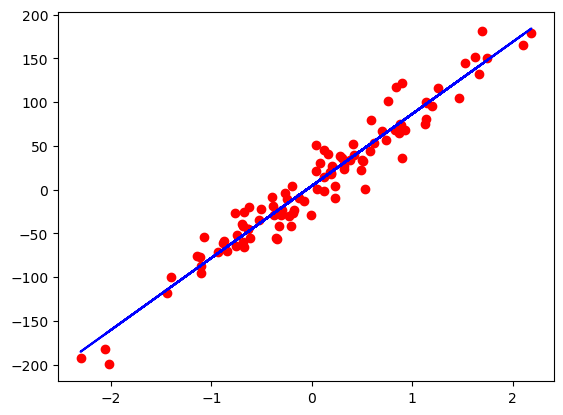

In [18]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## Video Leacture 8
### Logistic Regression

In [28]:
"""
Design model(input size, ouptut size, forawrd pass)
Construct loss and optimizer
Training Loop
- forward pass
- backward pass
- update weights
"""
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
# Prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # convert to column vector
y_test = y_test.view(y_test.shape[0], 1)


In [32]:
# model
# f = wx + b, sigmoid function in end
class LogesticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogesticRegression(n_features)

In [33]:
learning_rate = 0.01 
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [34]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass
    loss.backward()

    #updates
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0 or (epoch + 1) == num_epochs:
        print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')

epoch: 10, loss: 0.5501
epoch: 20, loss: 0.4577
epoch: 30, loss: 0.3978
epoch: 40, loss: 0.3558
epoch: 50, loss: 0.3245
epoch: 60, loss: 0.3001
epoch: 70, loss: 0.2806
epoch: 80, loss: 0.2644
epoch: 90, loss: 0.2509
epoch: 100, loss: 0.2393


In [36]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round() # round the value at 0.5
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9035


## Video Leacture 9
### Dataset and DataLoader

In [38]:
from torch.utils.data import Dataset, DataLoader
import math

In [50]:
class WineDataset(Dataset):
    def __init__(self):
        # data Loading
        data = np.loadtxt('./wine.csv', delimiter = ",", dtype = np.float32, skiprows = 1)
        self.x = torch.from_numpy(data[:,1:])
        self.y = torch.from_numpy(data[:,[0]]) # n_samples, 1
        self.n_samples = data.shape[0]
        
    def __getitem__(self, index):
        # dataset[0]
        return (self.x[index], self.y[index])
        
    def __len__(self):
        #len(dataset)
        return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True)

dataiter = iter(dataloader)
data = next(dataiter)
feature, label = data
print(feature)
print()
print(label)

tensor([[1.1030e+01, 1.5100e+00, 2.2000e+00, 2.1500e+01, 8.5000e+01, 2.4600e+00,
         2.1700e+00, 5.2000e-01, 2.0100e+00, 1.9000e+00, 1.7100e+00, 2.8700e+00,
         4.0700e+02],
        [1.2450e+01, 3.0300e+00, 2.6400e+00, 2.7000e+01, 9.7000e+01, 1.9000e+00,
         5.8000e-01, 6.3000e-01, 1.1400e+00, 7.5000e+00, 6.7000e-01, 1.7300e+00,
         8.8000e+02],
        [1.2420e+01, 1.6100e+00, 2.1900e+00, 2.2500e+01, 1.0800e+02, 2.0000e+00,
         2.0900e+00, 3.4000e-01, 1.6100e+00, 2.0600e+00, 1.0600e+00, 2.9600e+00,
         3.4500e+02],
        [1.2770e+01, 3.4300e+00, 1.9800e+00, 1.6000e+01, 8.0000e+01, 1.6300e+00,
         1.2500e+00, 4.3000e-01, 8.3000e-01, 3.4000e+00, 7.0000e-01, 2.1200e+00,
         3.7200e+02]])

tensor([[2.],
        [3.],
        [2.],
        [2.]])


In [55]:
# training loop dummy
num_epochs = 2
total_samples= len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward and update
        if (i+1) % 5 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, inputs: {inputs.shape}')

178 45
epoch: 1/2, step: 5/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 10/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 15/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 20/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 25/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 30/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 35/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 40/45, inputs: torch.Size([4, 13])
epoch: 1/2, step: 45/45, inputs: torch.Size([2, 13])
epoch: 2/2, step: 5/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 10/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 15/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 20/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 25/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 30/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 35/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 40/45, inputs: torch.Size([4, 13])
epoch: 2/2, step: 45/45, inputs: torch.Size([2, 13])


## Video Lecture 10
### Data Transforms

In [20]:
class WineDataset(Dataset):
    def __init__(self, transform = None):
        # data Loading
        data = np.loadtxt('./wine.csv', delimiter = ",", dtype = np.float32, skiprows = 1)
        self.x = data[:,1:]
        self.y = data[:,[0]]# n_samples, 1
        self.n_samples = data.shape[0]

        self.transform = transform
        
    def __getitem__(self, index):
        # dataset[0]
        sample = (self.x[index], self.y[index])
        if self.transform:
            sample = self.transform(sample)

        return sample
        
        
    def __len__(self):
        #len(dataset)
        return self.n_samples

# Custom Transform Classes
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return (torch.from_numpy(inputs), torch.from_numpy(targets))

class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return (inputs, targets)

dataset = WineDataset()
firstdata = dataset[0]
features, labels = firstdata
print(type(features), type(labels))
print(features)

print()
# Multiple Transforms used Together
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(3)])

dataset = WineDataset(transform = composed)
firstdata = dataset[0]
features, labels = firstdata
print(type(features), type(labels))
print(features)

## Video Lecture 11
### Softmax and CrossEntropy

In [79]:
x = torch.tensor([2.0, 1.0, 0.1])
output = torch.softmax(x, dim = 0) # computes it along the first axis
output

tensor([0.6590, 0.2424, 0.0986])

In [84]:
loss = nn.CrossEntropyLoss() # SoftMax Loss
"""
we must not implelent the soft-max at last player as it is done by CE loss itself
so no softmax in last layer of the model is required. and Y has class labels no need of one-hot encodeing the ground-truth
Y_pred which are model predictions has raw scores(logits) not softmax.

But in BCELoss there is no sigmoid inbuilt hence we need to 
add the sigmod in the model manually
"""
Y = torch.tensor([0]) # Class 0 is the ground truth
# n_samples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # raw values not softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) # raw values not softmax
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item())
print(l2.item())

# actual predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1) # predicted Class
print(predictions2) # predicted Class

0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])


In [25]:
# Softmax Model Dummy
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        # no softmax needed
        return out
        
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterions = nn.CrossEntropyLoss() # (applies softmax)

# Binary Classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred
        
model = NeuralNet1(input_size = 28*28, hidden_size = 5)
criterions = nn.BCELoss() # (applies softmax)


## Video Lecture 12
### Activation Functions

In [5]:
import torch.nn.functional as F
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        out = self.sigmoid(self.lin2(self.relu(self.lin1(x))))
        return out


## Video Lecture 13
### Digit Classification

In [96]:
"""
MNIST
DataLoader, Transformation
Multiple NN, activation function
Loss and Optimizer
Update Weights
Model opltimization
GPU support
"""
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [98]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [99]:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


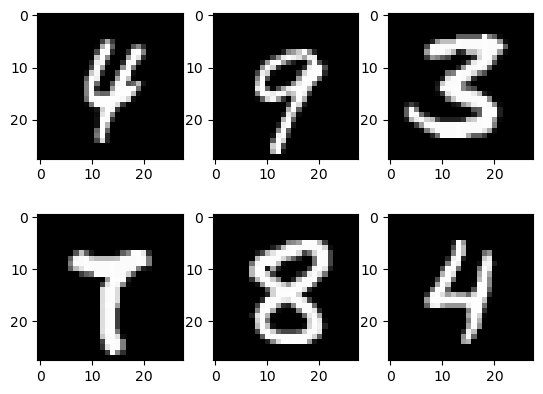

In [100]:
for i in range(6):
    plt.subplot(2, 3 ,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')

In [101]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [102]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [103]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28 * 28)
        images = images.to(device)
        labels = labels.to(device)
        # forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch: {epoch + 1}/ {num_epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}')
        

epoch: 1/ 2, step: 100/600, loss: 0.5714
epoch: 1/ 2, step: 200/600, loss: 0.3589
epoch: 1/ 2, step: 300/600, loss: 0.3044
epoch: 1/ 2, step: 400/600, loss: 0.4062
epoch: 1/ 2, step: 500/600, loss: 0.3188
epoch: 1/ 2, step: 600/600, loss: 0.1677
epoch: 2/ 2, step: 100/600, loss: 0.1649
epoch: 2/ 2, step: 200/600, loss: 0.2371
epoch: 2/ 2, step: 300/600, loss: 0.1017
epoch: 2/ 2, step: 400/600, loss: 0.3038
epoch: 2/ 2, step: 500/600, loss: 0.1752
epoch: 2/ 2, step: 600/600, loss: 0.1794


In [105]:
# test 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}, correct: {n_correct}, n_samples : {n_samples}')

accuracy = 95.4, correct: 9540, n_samples : 10000


## Video lecture 14

### Image Classification

In [9]:
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001


In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


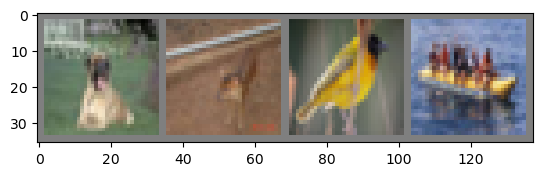

tensor([5, 4, 2, 8])


In [13]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [127]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5) #(input_channel, out_channels, kernal_size, stride, padding)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = ConvNet().to(device)

In [128]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/12500], Loss: 2.2949
Epoch [1/4], Step [4000/12500], Loss: 2.3203
Epoch [1/4], Step [6000/12500], Loss: 2.3038
Epoch [1/4], Step [8000/12500], Loss: 2.2468
Epoch [1/4], Step [10000/12500], Loss: 2.2400
Epoch [1/4], Step [12000/12500], Loss: 2.0043
Epoch [2/4], Step [2000/12500], Loss: 2.0847
Epoch [2/4], Step [4000/12500], Loss: 1.7207
Epoch [2/4], Step [6000/12500], Loss: 1.5233
Epoch [2/4], Step [8000/12500], Loss: 2.7012
Epoch [2/4], Step [10000/12500], Loss: 1.3447
Epoch [2/4], Step [12000/12500], Loss: 1.6396
Epoch [3/4], Step [2000/12500], Loss: 1.6443
Epoch [3/4], Step [4000/12500], Loss: 1.4480
Epoch [3/4], Step [6000/12500], Loss: 1.1182
Epoch [3/4], Step [8000/12500], Loss: 1.2715
Epoch [3/4], Step [10000/12500], Loss: 0.9260
Epoch [3/4], Step [12000/12500], Loss: 1.7155
Epoch [4/4], Step [2000/12500], Loss: 2.0037
Epoch [4/4], Step [4000/12500], Loss: 1.0543
Epoch [4/4], Step [6000/12500], Loss: 1.5534
Epoch [4/4], Step [8000/12500], Loss: 2.3386
Epoc

In [129]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 46.18 %
Accuracy of plane: 32.6 %
Accuracy of car: 47.0 %
Accuracy of bird: 31.2 %
Accuracy of cat: 29.4 %
Accuracy of deer: 21.6 %
Accuracy of dog: 41.0 %
Accuracy of frog: 68.5 %
Accuracy of horse: 54.9 %
Accuracy of ship: 71.6 %
Accuracy of truck: 64.0 %


## Video Lecture 15

### Transfer Learning

In [5]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time 
import os
import copy

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [10]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [11]:
data_dir = 'data/hymenoptera_data'
sets = ['train', 'val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
data_loader = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size = 4, shuffle = True) for x in ['train', 'val']}

dataset_size = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
print(class_names)

['ants', 'bees']


In [45]:
def train_model(model, criterion, optmizer, scheduler, num_epochs = 25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print(f'Epoch: {epoch}/{num_epochs - 1}')
        print('-'*10)

         # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() # Set model to training mode
            else:
                model.eval() # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in data_loader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_size[phase]
            epoch_acc = running_corrects.double() / dataset_size[phase]

            print(f'{phase} Loss : {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    time_elapsed = time.time() - since
    print(f'Training completed in {time_elapsed // 60 :.0f}m {time_elapsed % 60 :.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [46]:
#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained = True)
num_ftrs = model.fc.in_features # number of input features for the last layer

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

model.fc = nn.Linear(num_ftrs, 2) #(input feature, output features)
model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr = 0.001)

# scheduler
# update the lr

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()


step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs = 2)

Epoch: 0/1
----------
train Loss : 0.6417 Acc: 0.6230
val Loss : 0.4294 Acc: 0.8170

Epoch: 1/1
----------
train Loss : 0.5312 Acc: 0.7377
val Loss : 0.3327 Acc: 0.9020

Training completed in 0m 6s
Best val Acc: 0.9020


In [47]:
# option 2: Freeze all previous layers
#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()

model = models.resnet18(pretrained = True)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features # number of input features for the last layer

model.fc = nn.Linear(num_ftrs, 2) #(input feature, output features)
model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.SGD(model.parameters(), lr = 0.001)

# scheduler
# update the lr
# Decay LR by a factor of 0.1 every 5 epochs
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs = 2)

Epoch: 0/1
----------
train Loss : 0.6628 Acc: 0.6311
val Loss : 0.5446 Acc: 0.7320

Epoch: 1/1
----------
train Loss : 0.5353 Acc: 0.7664
val Loss : 0.5535 Acc: 0.6863

Training completed in 0m 6s
Best val Acc: 0.7320


## Video Lecture 17

### Saving and Loading Models

In [48]:
import torch
import torch.nn as nn

''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)

# model class must be defined somewhere
model = torch.load(PATH)
model.eval()

# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)

# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''


class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


############save only state dict #########################

# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())


###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

""" SAVING ON GPU/CPU 

# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""